## 1. Import Dependencies

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

## 2. Define Constants

In [2]:
plot_upadate_rate = 1  # Number of Epochs After which to update the Plot

num_data_points = 10000  # Number of Data Points to train on

max_x = 6.12  # Max Range on X axes

## 3. Generate data

In [3]:
X = np.linspace(-max_x, max_x, num_data_points)
Y = np.cos(X)

# Split the data using sklearn train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=2000, shuffle=True)



## 4. Define the Model

In [4]:
# Define the Keras sequential model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(50, activation="tanh", input_shape=(1,)),
        tf.keras.layers.Dense(50, activation="tanh"),
        tf.keras.layers.Dense(50, activation="tanh"),
        tf.keras.layers.Dense(1, activation=None),  # Linear activation for regression
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

c:\Users\hideo\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Define Callbacks

In [5]:
plot_dir = 'saved_plots'
os.makedirs(plot_dir, exist_ok=True)

# Function to update the plot
def update_plot(epoch, logs):
    if epoch % plot_upadate_rate == 0:
        y_pred = model.predict(x_test, verbose=0)

        plt.clf()
        # Set y-axis limits
        plt.ylim(-1.5, 1.5)
        # plt.xlim(-max_x, max_x)

        plt.scatter(x_test, y_test, label="True", color="red", s=0.2)
        plt.scatter(x_test, y_pred, label="Training", color="green", s=0.2)
        plt.title(f"Epoch: {epoch + 1}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        
        # Save the plot with a suitable name
        plot_filename = os.path.join(plot_dir, f'plot_epoch_{epoch}.png')
        plt.savefig(plot_filename)

In [6]:
# Callback to update the plot during training
plot_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=update_plot)

## 6. Train the Model

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4515
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1975
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1849e-04
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7100e-04
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9270e-04
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6380e-04
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1315e-04
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3095e-04
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1964e-04
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0401e-04
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6527e-04
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3225e-04  
Epoch 15/20
250

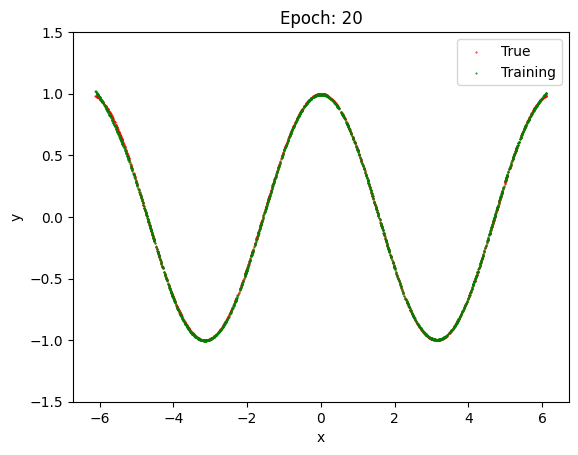

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, callbacks=[plot_callback])

## 7. Check Performance

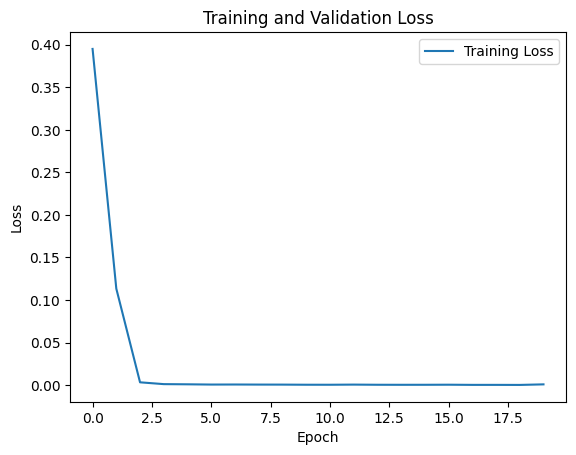

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("model_performance.png")
plt.show()

## 8. Test the Model

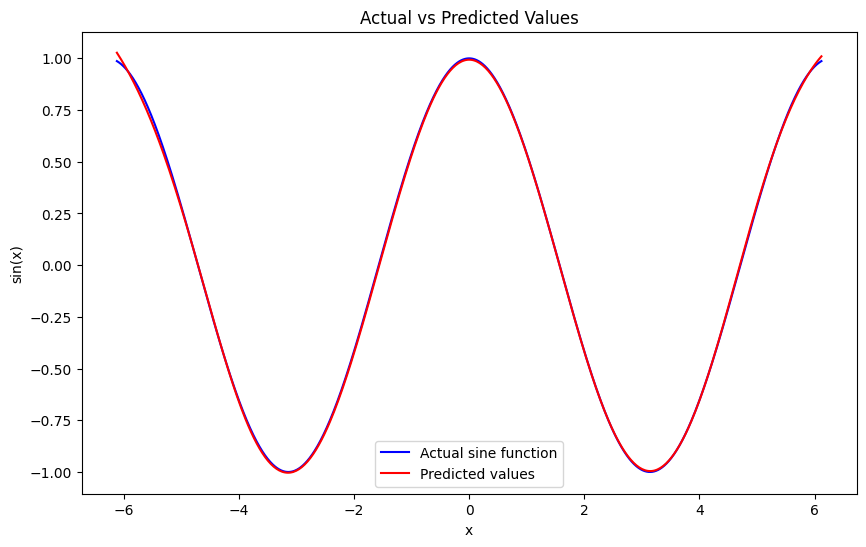

In [9]:
# Define test data for plotting
x_test = np.linspace(-max_x, max_x, 500)
# Make predictions on the test data
y_pred = model.predict(x_test, verbose=0)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='Actual sine function', color='blue')
plt.plot(x_test, y_pred, label='Predicted values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.legend()
plt.savefig('tested_values.png')
plt.show()

## 9. Save the Model 

In [10]:
model.save("sine_model.keras")